In [2]:
"""
1. Download the Python CIFAR-10 dataset from https://www.cs.toronto.edu/~kriz/cifar.html. 
This data set contains all the CIFAR-10 images stored as a series of pickle files. 
2. Use the code provided in the link to read the pickle file and extract the data and label. 
The data contains the images and the labels in the range 0-9. The link explains the relationship
 between label and the objects in the image.
3. Append all the data and label together.
4. Visualize the distribution of labels by plotting a histogram. Explain what you observe?
5. Write a generator function getbatch() that will return a batch of x and y as a tuple. 
The function must have the signature getbatch(alldata, alllabels, batch_size = 16). 
It must yield a tuple with a numpy array of x (the images) and a numpy array of y (the label). 
The size of each element in x must be [batchsize, noofchannels, width, height]

"""

'\n1. Download the Python CIFAR-10 dataset from https://www.cs.toronto.edu/~kriz/cifar.html. \nThis data set contains all the CIFAR-10 images stored as a series of pickle files. \n2. Use the code provided in the link to read the pickle file and extract the data and label. \nThe data contains the images and the labels in the range 0-9. The link explains the relationship\n between label and the objects in the image.\n3. Append all the data and label together.\n4. Visualize the distribution of labels by plotting a histogram. Explain what you observe?\n5. Write a generator function getbatch() that will return a batch of x and y as a tuple. \nThe function must have the signature getbatch(alldata, alllabels, batch_size = 16). \nIt must yield a tuple with a numpy array of x (the images) and a numpy array of y (the label). \nThe size of each element in x must be [batchsize, noofchannels, width, height]\n\n'

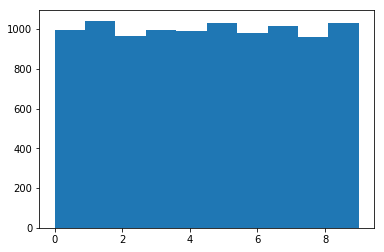

In [86]:
import pickle
import glob
import numpy as np
import random

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


files = glob.glob(
    "/Users/omerorhan/Desktop/UCSC/Deep Learning/cifar-10-batches-py/data_batch*")  #reading JSON files from folder

batchfiles = {}
for file in files:
    batchfiles.update(unpickle(file))

labels = batchfiles.get(b'labels')
data = batchfiles.get(b'data')

plt.hist(labels)
plt.show()



In [87]:
def getbatch(xval, yval, batchsize=16):
    count = 0
    arraylength = len(xval)
    while count < arraylength / batchsize:
        randstart = random.randint(0, arraylength - batchsize - 1)
        count += 1
        yield (xval[randstart:randstart + batchsize], yval[randstart:randstart + batchsize])


print(data.shape) #(10000, 3072)
#x.shape (16, 3072)
for x,y  in getbatch(data, labels):
    print(x.shape)
    


(10000, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 3072)
(16, 30